## Importing, Cleaning and Preprocessing the Data

In [153]:
#imports
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

### Import the data and examin structure of the data

In [44]:
#data
credit = pd.read_csv('default of credit card clients.csv')
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### Covariance estimation

In [46]:
cov = credit.cov()
print(cov)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

### Select features

In [55]:
X = credit.drop(['default payment next month', 'ID'], axis=1)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### Select dependent variable

In [49]:
y = credit[['default payment next month']]

### Principal Component Analysis

### Rescale features

In [52]:
#Scaling features to a range
scaler = MinMaxScaler(feature_range=[0, 1])
credit_rescaled = scaler.fit_transform(X)

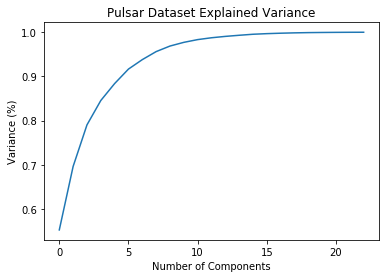

In [53]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(credit_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [54]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(credit_rescaled)

## Building the Models and Choose the Right Model

### Establish the training set, test set for x-vairables and y-variables

In [56]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

In [57]:
len(X_pca_train), len(X_pca_test), len(y_train), len(y_test)

(21000, 9000, 21000, 9000)

In [59]:
y_test_count = len(y_test.index)
print('The number of observations in the Y test set are:',str(y_test_count))
y_test.head()

The number of observations in the Y test set are: 9000


,default payment next month
8225,0
10794,0
9163,0
26591,0
6631,0


### KNN model fitting, tuning and scoring

In [60]:
from sklearn import neighbors

In [63]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1, p=2)
knn.fit(X_pca_train, y_train)

C:\Users\xixi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [66]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score


In [67]:
#show first 5 model predictions on the test data
knn.predict(X_pca_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [69]:
#check accuracy of our model on the test data
knn.score(X_pca_test, y_test)

0.7318888888888889

In [79]:
#Cross Validation
#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_pca, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_score mean{}'.format(np.mean(cv_scores)))

C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was

[0.77203799 0.762      0.77733333 0.78583333 0.78129688]
cv_score mean0.7757003086296381


#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = neighbors.KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {‘n_neighbors’: np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_pca, y)

In [83]:
from sklearn.model_selection import GridSearchCV
knn.get_params()
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [85]:
grid_search_cv = GridSearchCV(neighbors.KNeighborsClassifier(), params, n_jobs = -1, verbose = 1, cv = 10)

In [86]:
grid_search_cv.fit(X_pca_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.9s finished
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [88]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [93]:
#check mean score for the top performing value of n_neighbors
grid_search_cv.best_score_

0.8072380952380952

### Random forest model fitting, tuning and scoring

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_pca_train, y_train);

C:\Users\xixi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [147]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_pca_test)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.815


In [139]:
rf_cv_score = cross_val_score(rf, X_pca, y, cv=10, scoring='roc_auc')

C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

In [149]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[6654  406]
 [1259  681]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7060
           1       0.63      0.35      0.45      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



=== All AUC Scores ===
[0.72862438 0.72676296 0.73263658 0.7264343  0.7601676  0.76203336
 0.78011361 0.75543884 0.76575575 0.76454995]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7502517332421819


#### Tuning hyperparameter

In [155]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rf_random.fit(X_pca_train, y_train)
# print results
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 62.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 117.2min finished
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 300}


In [157]:
rf_tune = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rf_tune.fit(X_pca_train,y_train)
rf_tune_predict = rf_tune.predict(X_pca_test)
rf_tune_cv_score = cross_val_score(rf_tune, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_tune_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_tune_predict))
print('\n')
print("=== All AUC Scores ===")
print(rf_tune_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_tune_cv_score.mean())

C:\Users\xixi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

=== Confusion Matrix ===
[[6649  411]
 [1262  678]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7060
           1       0.62      0.35      0.45      1940

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



=== All AUC Scores ===
[0.74909619 0.74056077 0.74900339 0.73700096 0.77111722 0.7851685
 0.80443908 0.77129434 0.78248292 0.78279639]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7672959754227668


### SVC classification model fitting, tuning and scoring

In [121]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [122]:
C = 1.0
svc = LinearSVC(C=C)
svc.fit(X_pca_train,y_train)

C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [120]:
y_pred = svc.predict(X_pca_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7060
           1       0.75      0.16      0.27      1940

    accuracy                           0.81      9000
   macro avg       0.78      0.57      0.58      9000
weighted avg       0.80      0.81      0.76      9000



In [128]:
C = 1.0
svc = SVC(degree=10, C=C, gamma='auto')
svc.fit(X_pca_train, y_train)

C:\Users\xixi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
y_pred = svc.predict(X_pca_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7060
           1       0.75      0.04      0.08      1940

    accuracy                           0.79      9000
   macro avg       0.77      0.52      0.48      9000
weighted avg       0.78      0.79      0.71      9000



## Making Predictions

In [163]:
prediction = rf_tune.predict(X_pca_train)

In [164]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)